In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, a, y):
        m = len(y)
        return -(1/m) * np.sum(
            y * np.log(a + 1e-9) + (1 - y) * np.log(1 - a + 1e-9)
        )

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.bias = 0
        
        m = len(y)
        for _ in range(self.n_iterations):
            z = np.dot(X, self.theta) + self.bias
            a = self.sigmoid(z)
            cost = self.compute_cost(a, y)
            self.cost_history.append(cost)
            dz = a - y
            dtheta = (1 / m) * np.dot(X.T, dz)
            dbias = (1 / m) * np.sum(dz)
            self.theta -= self.lr * dtheta
            self.bias -= self.lr * dbias

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.theta) + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [3]:

X = pd.read_csv("logisticX.csv")
y = pd.read_csv("logisticY.csv")

X = X.values
y = y.values.ravel()


In [4]:
model = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
model.fit(X, y)
final_cost = model.cost_history[-1]
print("Final Cost:", final_cost)
print("Coefficients:", model.theta)
print("Bias:", model.bias)

Final Cost: 0.22556054625424488
Coefficients: [ 1.93800501 -1.90093439]
Bias: 0.07804027589035033


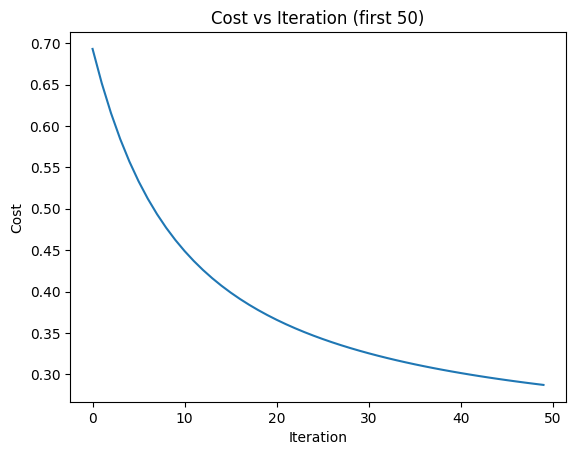

In [5]:
# Plot cost vs iteration for the first 50 iterations
plt.figure()
plt.plot(model.cost_history[:50])
plt.title("Cost vs Iteration (first 50)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

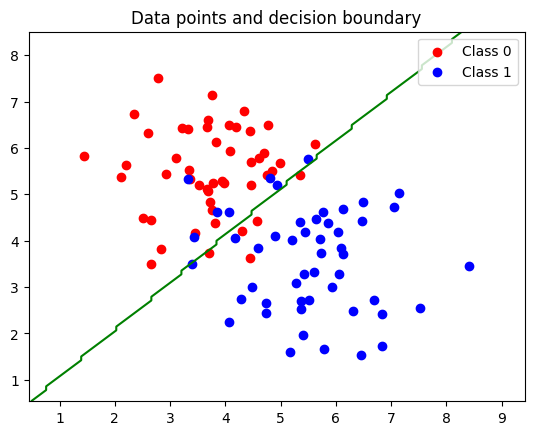

In [6]:
# Plot data points and decision boundary
plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='green')

plt.legend()
plt.title("Data points and decision boundary")
plt.show()

In [7]:
# Create new features X^2
X_extended = np.hstack([X, X[:, 0:2]**2])  # assume first two columns are the original features
model2 = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
model2.fit(X_extended, y)

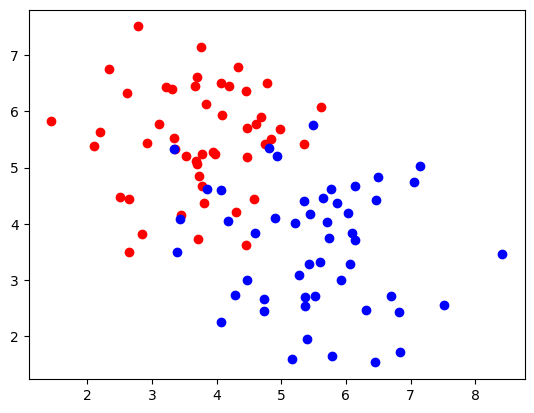

In [8]:
# Plot new boundary
plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')

x_min2, x_max2 = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min2, y_max2 = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.linspace(x_min2, x_max2, 100),
                       np.linspace(y_min2, y_max2, 100))


C:\Users\KIIT\AppData\Local\Temp\ipykernel_7928\533934437.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


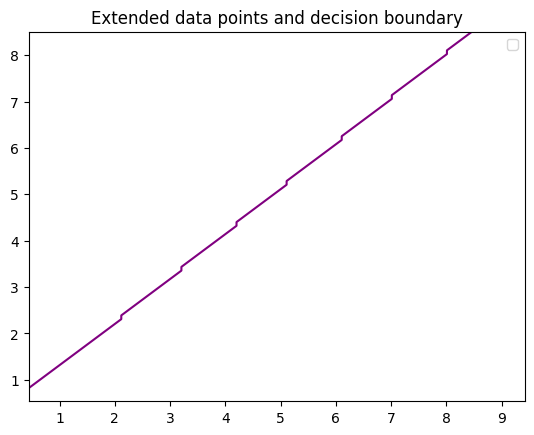

In [9]:
# Extend the grid with squared features
xx2_sq = xx2**2
yy2_sq = yy2**2
grid_extended = np.c_[xx2.ravel(), yy2.ravel(), xx2_sq.ravel(), yy2_sq.ravel()]

Z2 = model2.predict(grid_extended)
Z2 = Z2.reshape(xx2.shape)
plt.contour(xx2, yy2, Z2, levels=[0.5], colors='purple')

plt.legend()
plt.title("Extended data points and decision boundary")
plt.show()

In [10]:
# Confusion matrix
y_pred = model.predict(X)
tp = np.sum((y_pred == 1) & (y == 1))
tn = np.sum((y_pred == 0) & (y == 0))
fp = np.sum((y_pred == 1) & (y == 0))
fn = np.sum((y_pred == 0) & (y == 1))

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp + 1e-9)
recall = tp / (tp + fn + 1e-9)
f1_score = 2 * (precision * recall) / (precision + recall + 1e-9)

print("Confusion Matrix:")
print([[tn, fp],[fn, tp]])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Confusion Matrix:
[[44, 5], [7, 43]]
Accuracy: 0.8787878787878788
Precision: 0.8958333333146702
Recall: 0.8599999999828001
F1-score: 0.8775510198904624
